<a href="https://colab.research.google.com/github/DheerendraAchar/CIFAR---10-Object-Recognition-using-ResNet50/blob/main/DL_Project_CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:08<00:00, 148MB/s]
100% 715M/715M [00:08<00:00, 90.8MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 35.4 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2
import glob
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['3834.png', '617.png', '11214.png', '32221.png', '34639.png']
['23821.png', '16095.png', '4357.png', '35545.png', '49252.png']


**Labels Processing**

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [ ]:
labels_df[labels_df['id'] == 7796]

id label
7795  7796  frog

In [ ]:
labels_df.head(10)

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
5   6  automobile
6   7        bird
7   8       horse
8   9        ship
9  10         cat

In [ ]:
labels_df.tail(10)

id       label
49990  49991        deer
49991  49992        bird
49992  49993    airplane
49993  49994  automobile
49994  49995    airplane
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


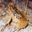

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

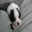

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

id label
45887  45888   dog

In [ ]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
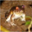

In [ ]:
data[0]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
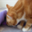

In [ ]:
X_train[0]

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.2427 - loss: 2.0701 - val_acc: 0.3318 - val_loss: 1.8531
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3431 - loss: 1.8342 - val_acc: 0.3692 - val_loss: 1.7420
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3681 - loss: 1.7618 - val_acc: 0.3615 - val_loss: 1.7643
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3781 - loss: 1.7282 - val_acc: 0.3778 - val_loss: 1.7181
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3906 - loss: 1.7015 - val_acc: 0.3920 - val_loss: 1.6917
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3924 - loss: 1.6987 - val_acc: 0.3837 - val_loss: 1.7179
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3919 - loss: 1.6869 - val_acc: 0.3993 - val_loss: 1.6791
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4001 - loss: 1.6684 - val_acc: 0.3885 - val_loss: 1.6957
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 429s 334ms/step - acc: 0.3363 - loss: 2.0298 - val_acc: 0.7657 - val_loss: 0.8864
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 413s 336ms/step - acc: 0.6788 - loss: 1.0520 - val_acc: 0.8895 - val_loss: 0.4549
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 328ms/step - acc: 0.8040 - loss: 0.7429 - val_acc: 0.9172 - val_loss: 0.3407
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 336ms/step - acc: 0.8704 - loss: 0.5601 - val_acc: 0.9247 - val_loss: 0.2915
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - acc: 0.9088 - loss: 0.4318 - val_acc: 0.9395 - val_loss: 0.2368
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - acc: 0.9356 - loss: 0.3473 - val_acc: 0.9385 - val_loss: 0.2285
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 327ms/step - acc: 0.9540 - loss: 0.2679 - val_acc: 0.9395 - val_loss: 0.2176
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 368s 327ms/step - acc: 0.9643 - loss: 0.2240 - val_acc: 0.9380 - val_loss: 0.2296
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 105ms/step - acc: 0.9306 - loss: 0.2528
Test Accuracy = 0.9329000115394592


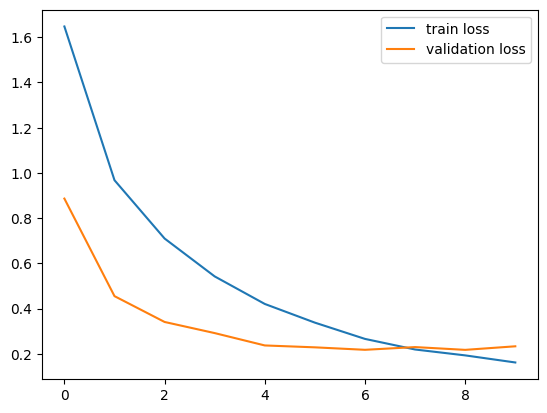

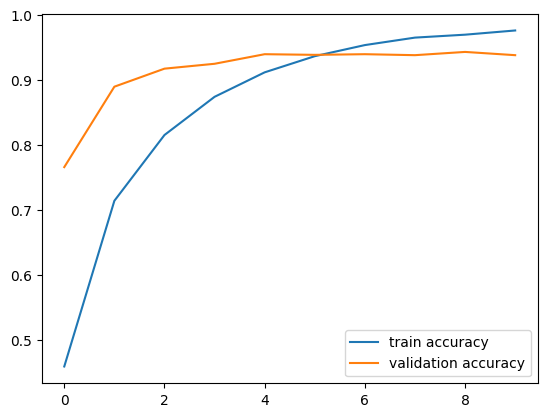

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/airplane.webp


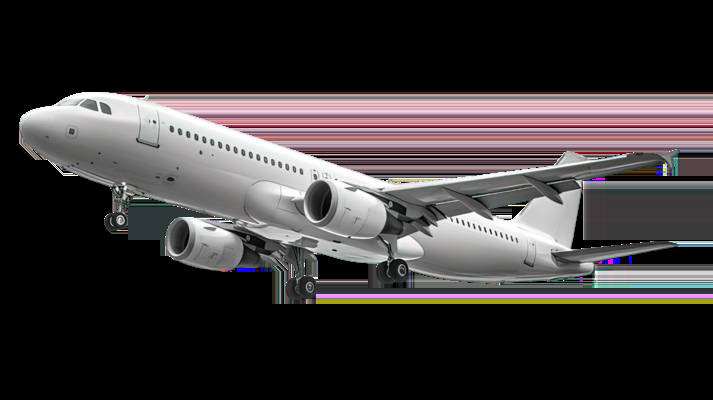

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.8994046e-01 6.4408849e-04 2.8658386e-03 9.4484148e-04 1.2581138e-04
  9.1917714e-04 1.6664962e-03 1.0255795e-03 7.1224337e-04 1.1554953e-03]]
0
The image represents a Airplane


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Airplane')

if input_pred_label == 1:
  print('The image represents a Automobile')

  if input_pred_label == 2:
   print('The image represents a bird')

  if input_pred_label == 3:
   print('The image represents a car')

  if input_pred_label == 4:
   print('The image represents a deer')

  if input_pred_label == 5:
   print('The image represents a dog')

  if input_pred_label == 6:
   print('The image represents a frog')

  if input_pred_label == 7:
   print('The image represents a horse')

  if input_pred_label == 8:
   print('The image represents a ship')

  if input_pred_label == 9:
   print('The image represents a truck')

Path of the image to be predicted: /content/truck.webp


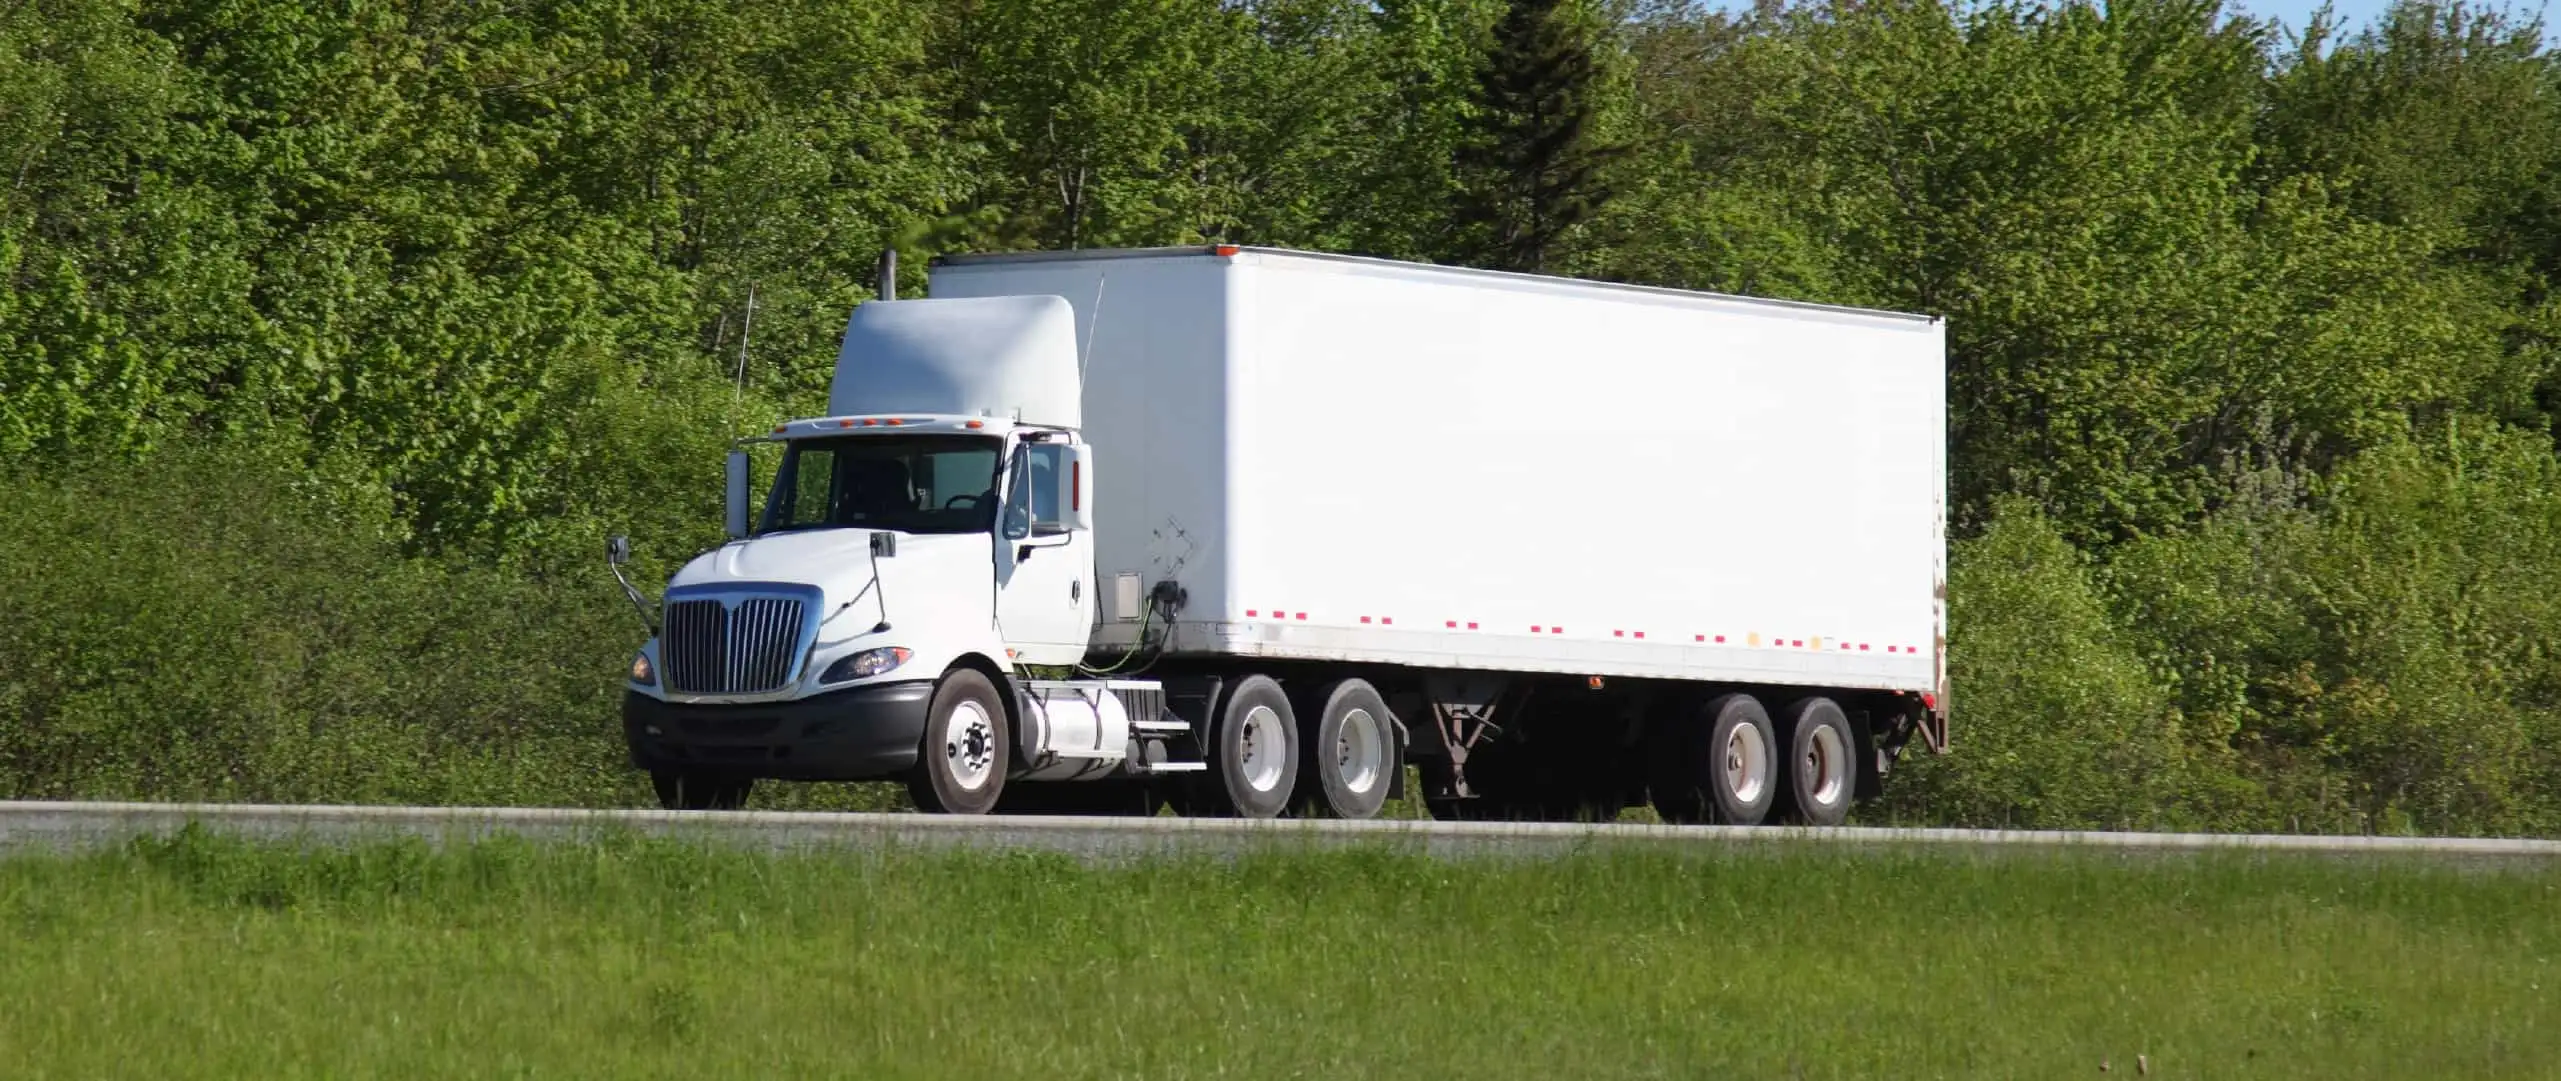

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.00278977 0.00642115 0.00675054 0.00621001 0.00390253 0.0027402
  0.00986602 0.00352428 0.01981195 0.9379835 ]]
9
The image represents a truck


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Airplane')

if input_pred_label == 1:
  print('The image represents a Automobile')

if input_pred_label == 2:
  print('The image represents a bird')

if input_pred_label == 3:
  print('The image represents a car')

if input_pred_label == 4:
  print('The image represents a deer')

if input_pred_label == 5:
  print('The image represents a dog')

if input_pred_label == 6:
  print('The image represents a frog')

if input_pred_label == 7:
  print('The image represents a horse')

if input_pred_label == 8:
  print('The image represents a ship')

if input_pred_label == 9:
  print('The image represents a truck')

Path of the image to be predicted: /content/allinonedl.webp


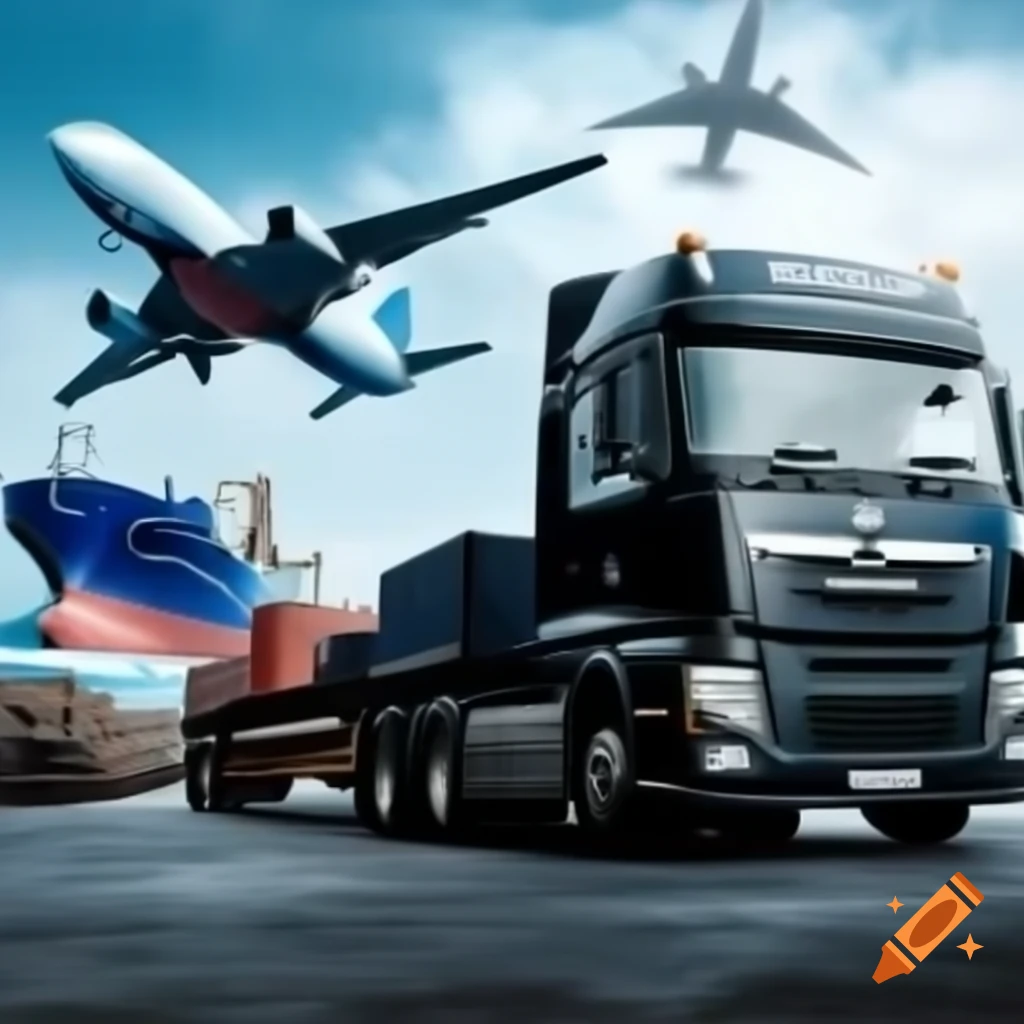

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.7372441  0.02936199 0.02277925 0.02180805 0.00343078 0.01502247
  0.02305494 0.0100415  0.04156204 0.09569476]]
0
The image represents a Airplane


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Airplane')

if input_pred_label == 1:
  print('The image represents a Automobile')

if input_pred_label == 2:
  print('The image represents a bird')

if input_pred_label == 3:
  print('The image represents a car')

if input_pred_label == 4:
  print('The image represents a deer')

if input_pred_label == 5:
  print('The image represents a dog')

if input_pred_label == 6:
  print('The image represents a frog')

if input_pred_label == 7:
  print('The image represents a horse')

if input_pred_label == 8:
  print('The image represents a ship')

if input_pred_label == 9:
  print('The image represents a truck')